In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [197]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [198]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [199]:
df1=df.drop(['area_type','availability','society'],axis='columns')

In [200]:
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [201]:
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [202]:
df2=df1.dropna() #removing nan columns

In [203]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [204]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [205]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [206]:
def findBhk(x):
    return int(x.split(' ')[0])
x=findBhk('2 dsfa')
x

2

In [207]:
df2['bhk']=df2['size'].apply(lambda x:findBhk(x)) #convert the bhk to a single numbers

C:\Users\USER\AppData\Local\Temp\ipykernel_16744\4285672120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:findBhk(x)) #convert the bhk to a single numbers


In [208]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [209]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [210]:
df3=df2.drop(['size'],axis='columns')
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [211]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [212]:
def convertsqftnum(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
x=convertsqftnum("1000q")
x

In [213]:
df4=df3.copy()
df4['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13314    1715
13315    3453
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 12710, dtype: object

In [214]:
df4['total_sqft']=df4['total_sqft'].apply(lambda x:convertsqftnum(x))#converting sqft to flaot(ranges becomes to average sqft,numerics with letters are removed)
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [215]:
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [216]:
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [217]:
len(df['location'].unique())

1306

In [218]:
df5=df4.copy()
df5

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [219]:
df5['price_per_sqrt']=df5['price']*100000/df5['total_sqft']

In [220]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [221]:
df5.location=df5.location.apply(lambda x: x.strip())
locationstats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
locationstats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [222]:
len(locationstats[locationstats>=10])

247

In [223]:
locationstatslessthan10=locationstats[locationstats<=10]
locationstatslessthan10

location
Kalkere                  10
Dairy Circle             10
Nagappa Reddy Layout     10
Ganga Nagar              10
1st Block Koramangala    10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1028, dtype: int64

In [224]:
def locationfind(x):  #this is one technique for reducing string values.we consider less no of occcurences as other.then it's easy for one hot encoding
    if(x in locationstatslessthan10):
        return 'other'
    else:
        return x
df5['location']=df.location.apply(lambda x:locationfind(x))
df5.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


In [225]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [226]:
df6.price_per_sqrt.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [227]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=subdf.price_per_sqrt.mean()
        st=subdf.price_per_sqrt.std()
        reduced_df=subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        
        
        
df7=remove_pps_outliers(df6)
#here we  are removing outliers using one standard devitaions.
#so here we grouped the data accroding to the location and calculated the mean and std for each per location.

In [228]:
df7.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,1130.0,2.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,1417.0,2.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,1230.0,2.0,1.0,58.0,2,4715.447154
9,Devarachikkanahalli,1705.0,3.0,2.0,75.0,3,4398.826979


In [229]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.bhk==2) & (df.location==location)]
    bhk3=df[(df.bhk==3) & (df.location==location)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqrt,color='blue',marker='+')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqrt,color='green',marker='*')
    plt.xlabel('Total square feet')
    plt.ylabel('price per square feet')
    plt.show()
    



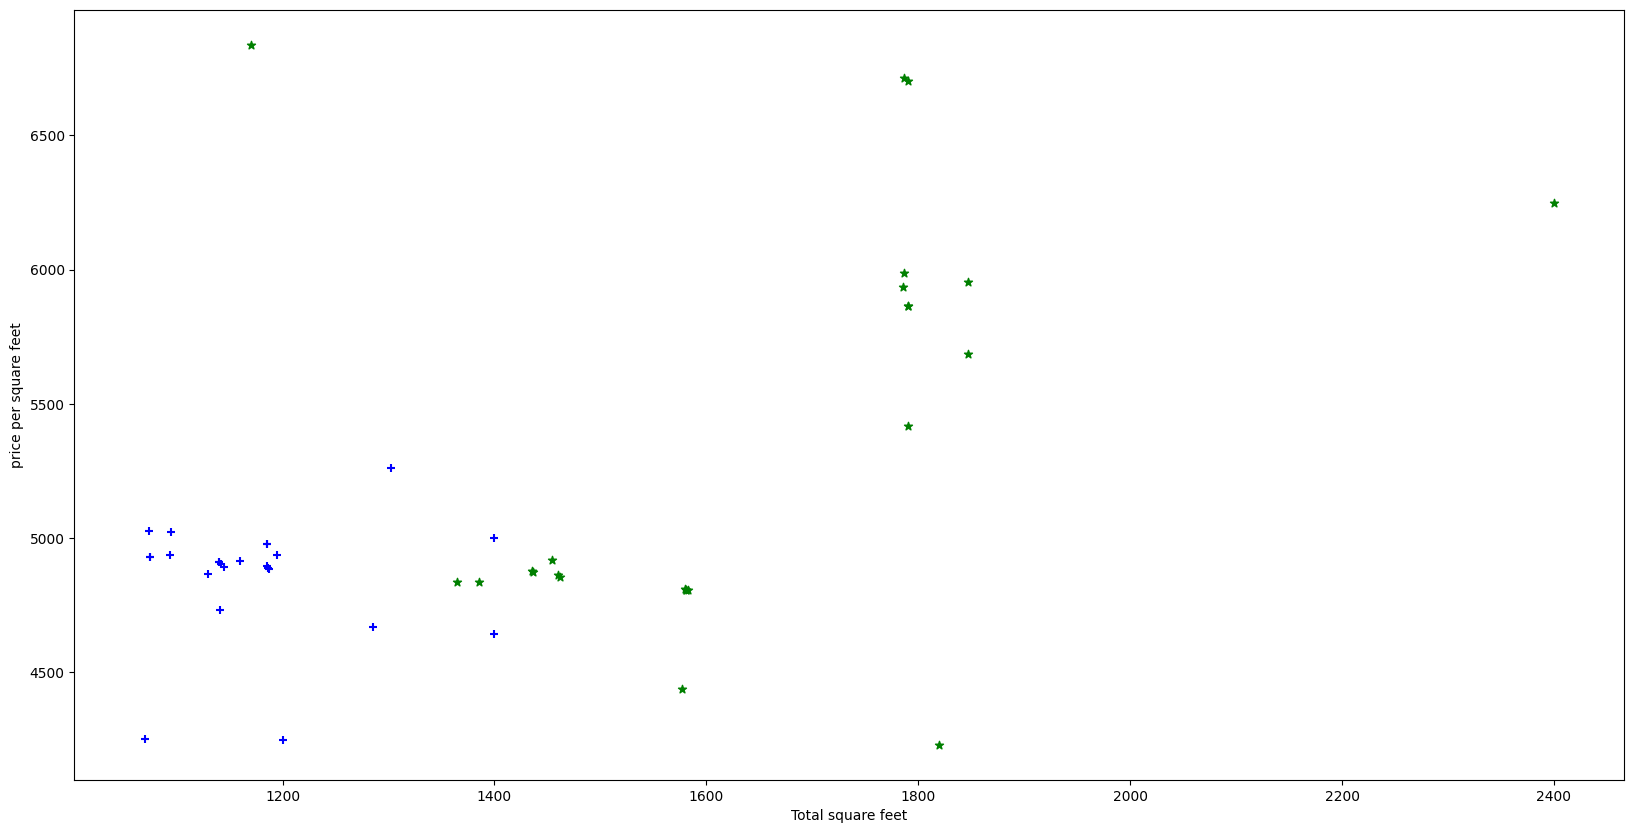

In [230]:
plot_scatter_chart(df7,'Kothanur')

In [231]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqrt),
                'std':np.std(bhk_df.price_per_sqrt),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')        

In [232]:
#Here we are removing outliers of bhk baesd on prices per sqrt per location
#Here outliers are removed in same location,in same square area,the no of bhk is small than another record and it's price is high

In [233]:
df8=remove_bhk_outlier(df7)
df8.shape

(9896, 7)

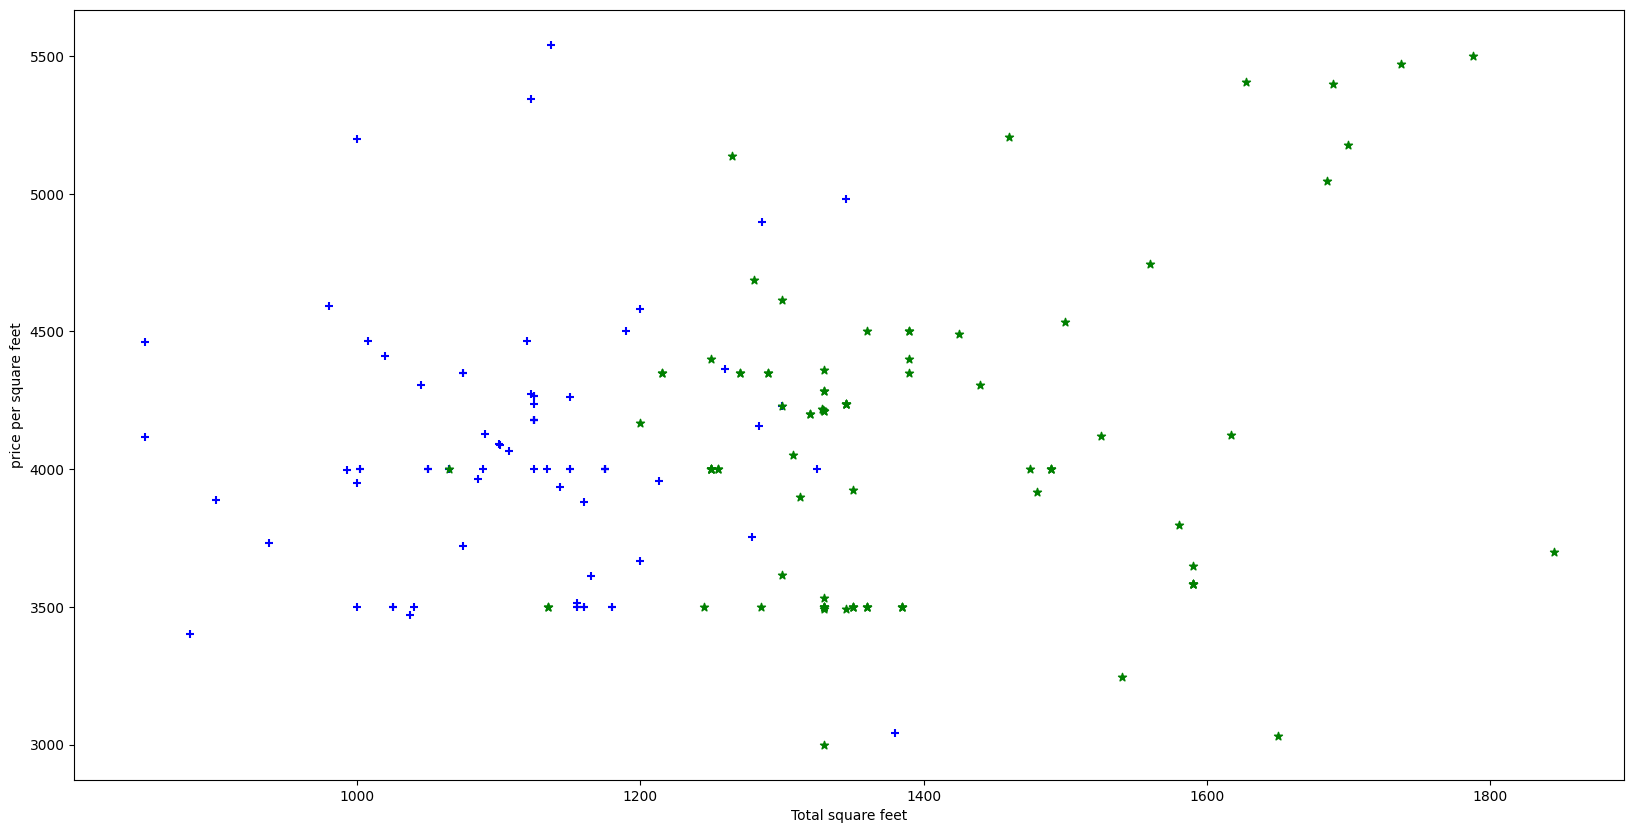

In [234]:
plot_scatter_chart(df8,'Uttarahalli')

(array([9.618e+03, 2.590e+02, 1.100e+01, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  300.,  3310.,  6320.,  9330., 12340., 15350., 18360., 21370.,
        24380., 27390., 30400.]),
 <BarContainer object of 10 artists>)

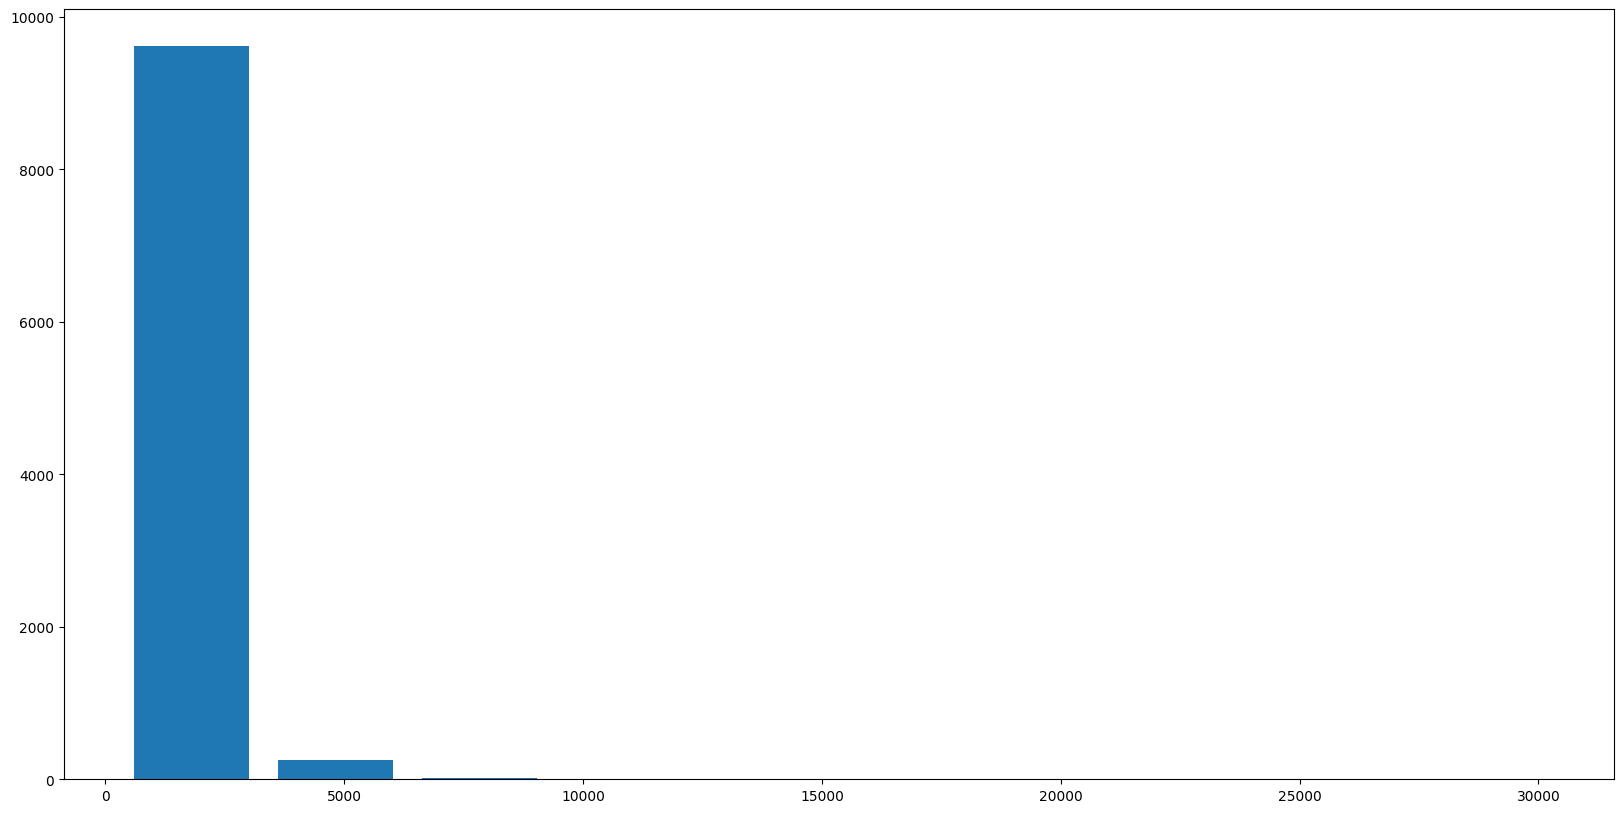

In [235]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.total_sqft,rwidth=0.8)

In [236]:
df8

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,4540.654699
...,...,...,...,...,...,...,...
9893,other,1256.0,2.0,1.0,65.00,2,5175.159236
9894,other,1353.0,2.0,2.0,110.00,2,8130.081301
9895,other,812.0,1.0,0.0,26.00,1,3201.970443
9896,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [237]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [238]:
df8[(df8.bath>10)]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
9318,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [239]:
df9=df8[~(df8.bath>df8.bhk+2)]
df9
#Here we have removed outliers,when there are more than two bathrooms than the count of bhk

,location,total_sqft,bath,balcony,price,bhk,price_per_sqrt
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,4540.654699
...,...,...,...,...,...,...,...
9893,other,1256.0,2.0,1.0,65.00,2,5175.159236
9894,other,1353.0,2.0,2.0,110.00,2,8130.081301
9895,other,812.0,1.0,0.0,26.00,1,3201.970443
9896,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [240]:
df9.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'count')

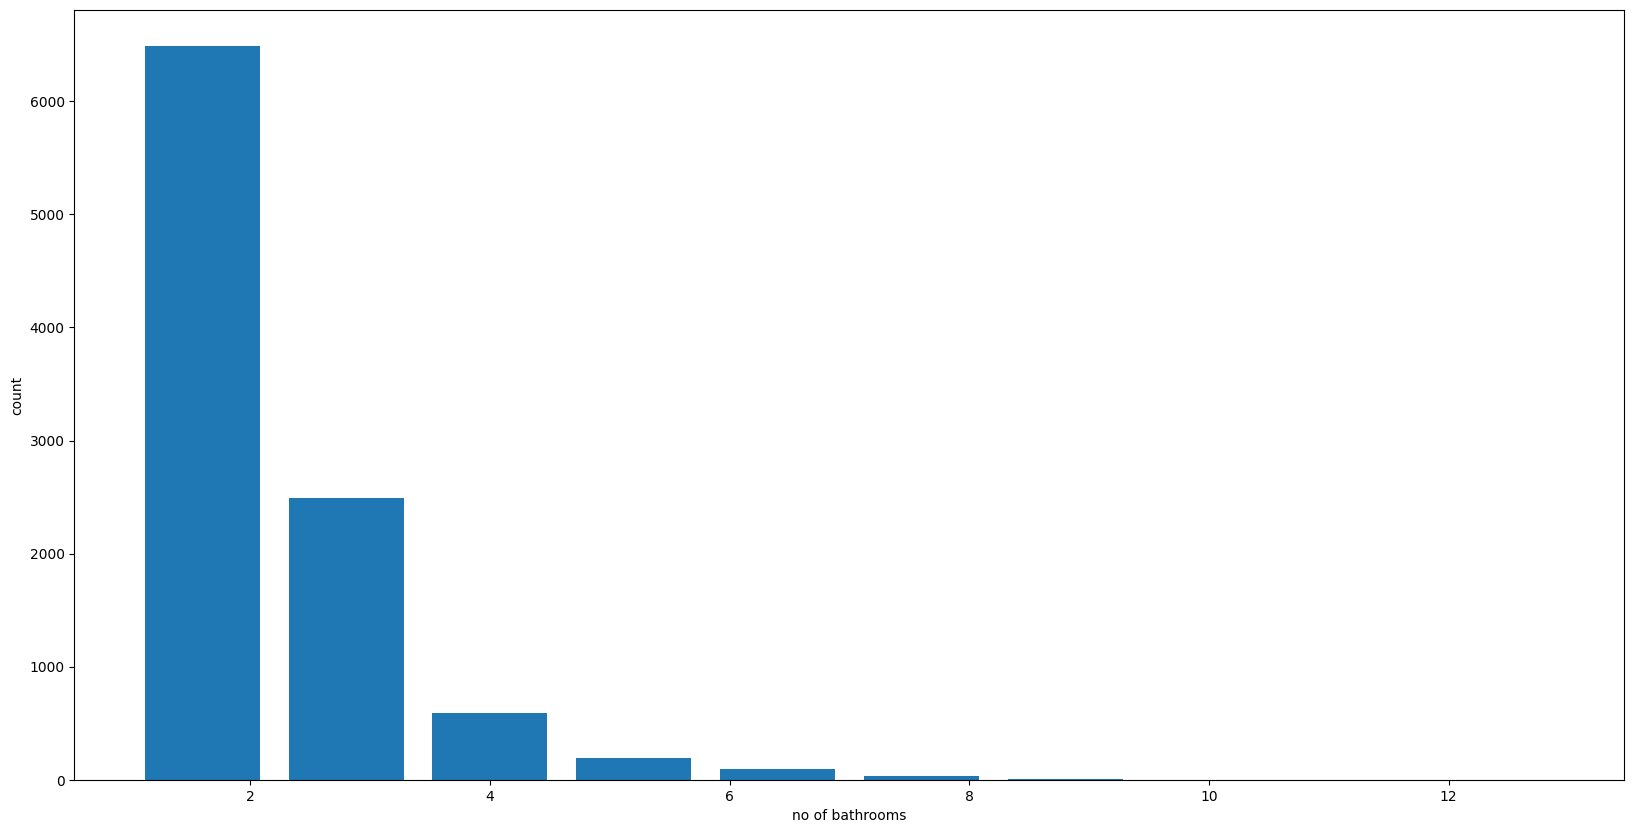

In [241]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('no of bathrooms')
plt.ylabel('count')

In [242]:
df10=df9.drop(['price_per_sqrt'],axis='columns')
df10

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.00,2
...,...,...,...,...,...,...
9893,other,1256.0,2.0,1.0,65.00,2
9894,other,1353.0,2.0,2.0,110.00,2
9895,other,812.0,1.0,0.0,26.00,1
9896,other,1440.0,2.0,2.0,63.93,3


In [243]:
dummies=pd.get_dummies(df10.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [244]:
df11=pd.concat([df10,dummies],axis='columns')
df11

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,other,1256.0,2.0,1.0,65.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9894,other,1353.0,2.0,2.0,110.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9895,other,812.0,1.0,0.0,26.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9896,other,1440.0,2.0,2.0,63.93,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [245]:
df12=df11.drop(['location','other'],axis='columns')
df12

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,1256.0,2.0,1.0,65.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1353.0,2.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,812.0,1.0,0.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,1440.0,2.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
x=df12.drop(['price'],axis='columns')
y=df12.price

In [247]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
len(xtrain)

7914

In [262]:
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)


0.8363259467626089

In [249]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [250]:
scores=cross_val_score(model,x,y,cv=cv)
scores

array([0.8280282 , 0.81932075, 0.7841084 , 0.80874854, 0.73316465])

In [251]:
scores.mean()

0.7946741090551652

In [252]:
models={
    'linearregression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },
    'decision_tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
        }
    }
}

In [253]:
scores=[]
for modelname,mp in models.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':modelname,
        'best params':clf.best_score_,
        'best scores':clf.best_params_
    })
scores

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

[{'model': 'linearregression',
  'best params': 0.7946741090551652,
  'best scores': {}},
 {'model': 'lasso',
  'best params': 0.6546090244644182,
  'best scores': {'alpha': 1, 'selection': 'cyclic'}},
 {'model': 'decision_tree',
  'best params': 0.6021234871548341,
  'best scores': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

In [254]:
dfres=pd.DataFrame(scores,columns=['model','best params','best scores'])
dfres

,model,best params,best scores
0,linearregression,0.794674,{}
1,lasso,0.654609,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.602123,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [255]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [261]:
np.where(x.columns=='Vijayanagar')[0][0] #to find the index of the location column

231

In [267]:
def predictPrice(location,sqft,bath,bhk):
    locindex=np.where(x.columns==location)[0][0]
    col=np.zeros(len(x.columns)) #here we create all zeros variable equal to the size of the no of columns
    col[0]=sqft
    col[1]=bath
    col[2]=bhk
    if(locindex>=0):
        col[locindex]=1
    return model.predict([col])[0]

In [271]:
predictPrice('Whitefield',2000,3,3) #predicted price for whitefiels,3 bedrooms with 3 bathrooom

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


141.284433587739

In [277]:
import pickle
f=open('Realstatepredictpricemodel.pickle','wb')
pickle.dump(model,f)

In [274]:
import json
columns={
    'datacolumns':[col.lower() for col in x.columns]
}

In [276]:
f=open('columns.json','w')
f.write(json.dumps(columns))

3954